# Bank Customer Churn Prediction

In [64]:
# importing Libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [65]:
#loading the dataset
df = dataset = pd.read_csv('data/churn.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


# Data Preprocessing 1

In [66]:
df.shape

(10000, 14)

In [67]:
# drop the unnecessary columns
df = df.drop(['RowNumber','CustomerId','Surname'], axis=1)

In [68]:
df.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [69]:
df.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [70]:
df.duplicated().sum()

0

In [71]:
#renaming the column

df.rename(columns={'Exited': 'Churn'}, inplace=True)

In [72]:
df.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Churn
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [73]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Churn
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


# EDA:

EDA is the process of analyzing and summarizing datasets to understand their main characteristics, often using visualizations, statistical summaries, and simple data transformations. It’s like “getting to know” your data before applying models.

Why we use it?

- To understand data structure (rows, columns, data types).

- To find patterns, trends, and relationships between variables.

- To detect anomalies or outliers that might affect analysis.

- To identify missing values and data quality issues.

- To guide feature selection and preprocessing steps.

- To choose suitable models and techniques based on insights.

Think of EDA as the diagnostic check-up before performing surgery — it ensures we know what’s going on inside the data before making big decisions.





#### Pie Chart for Customer Churn

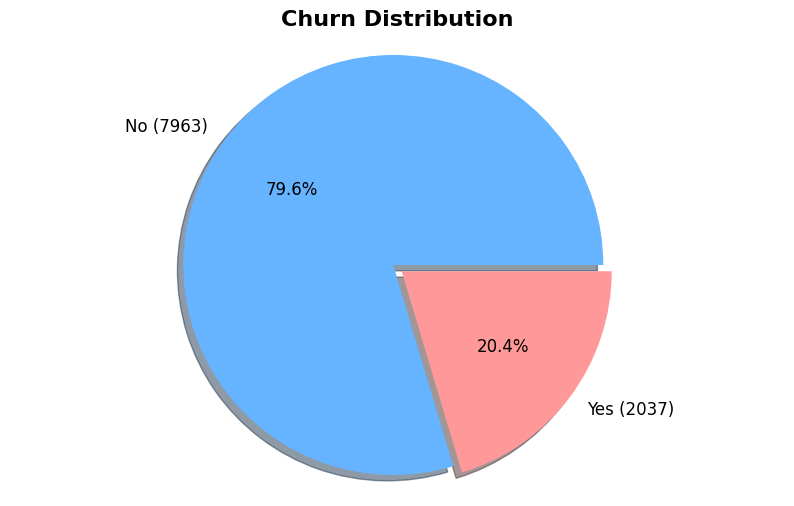

In [75]:
import matplotlib.pyplot as plt

# Data
churn_counts = df['Churn'].value_counts()
labels = ['No', 'Yes']
colors = ['#66b3ff', '#ff9999']  # Blue for No, Pink for Yes
explode = (0, 0.05)  # Slightly separate 'Yes' slice

# Plot
plt.figure(figsize=(10, 6))
plt.pie(churn_counts,
        labels=[f'{label} ({count})' for label, count in zip(labels, churn_counts)],
        autopct='%1.1f%%',        
        colors=colors,
        explode=explode,
        shadow=True,
        textprops={'fontsize': 12})

plt.title('Churn Distribution', fontsize=16, fontweight='bold')
plt.axis('equal')  # Keep chart circular
plt.show()


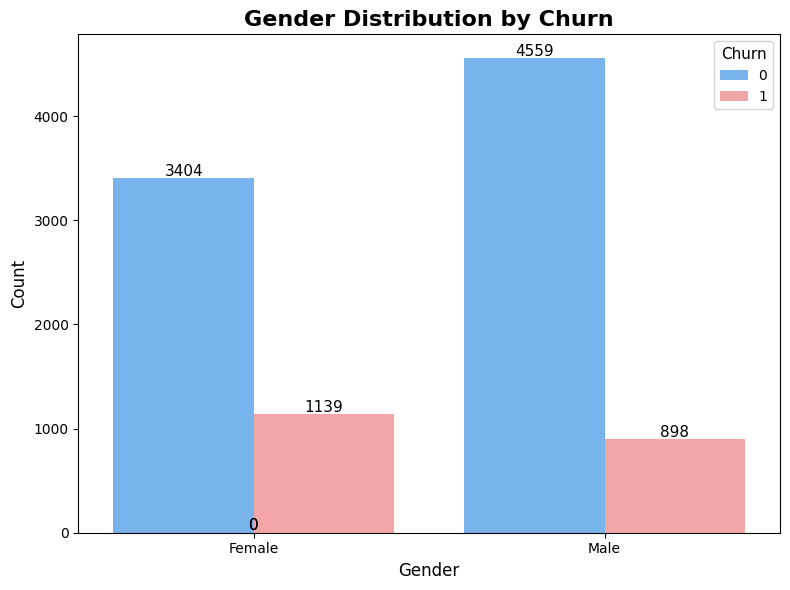

In [76]:
import seaborn as sns
import matplotlib.pyplot as plt

# Custom colors for 'No' and 'Yes'
colors = ['#66b3ff', '#ff9999']

plt.figure(figsize=(8, 6))
ax = sns.countplot(x='Gender', data=df, hue='Churn', palette=colors)

# Add value labels on top of bars
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', fontsize=11, color='black', 
                xytext=(0, 5), textcoords='offset points')

# Titles and labels
plt.title('Gender Distribution by Churn', fontsize=16, fontweight='bold')
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(title='Churn', fontsize=10, title_fontsize=11)
plt.tight_layout()
plt.show()


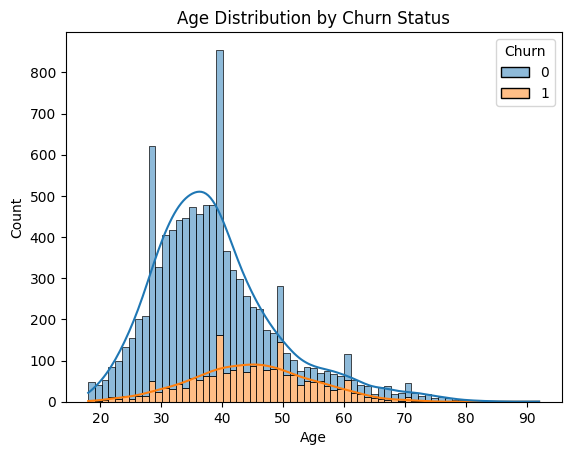

In [77]:
#histogram for age distribution
sns.histplot(data=df, x="Age", hue="Churn", multiple="stack",kde=True)
plt.title("Age Distribution by Churn Status")
plt.show()

**report:**
* Most customers: **25–50 yrs**, peak around **35–45**.
* Churn mostly in **30–50** range.
* Few customers under 25 or over 65.
* Focus retention on **30–50** group.


# Credit Score

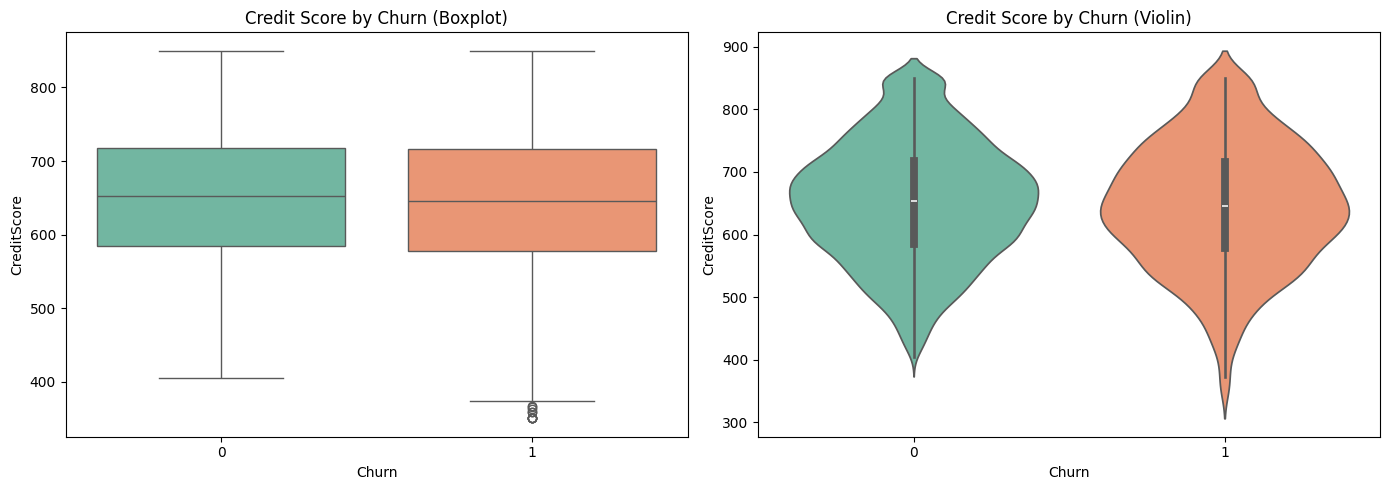

In [78]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

sns.boxplot(data=df, x="Churn", y="CreditScore", hue="Churn", palette="Set2", legend=False, ax=axes[0])
axes[0].set_title("Credit Score by Churn (Boxplot)")

sns.violinplot(data=df, x="Churn", y="CreditScore", hue="Churn", palette="Set2", legend=False, ax=axes[1])
axes[1].set_title("Credit Score by Churn (Violin)")

plt.tight_layout()
plt.show()


**Report:**
- Median credit score is slightly higher for non-churned customers (0) than churned (1).

- Score distribution spreads are similar, but churned customers have more low-score outliers.

# Customer Location

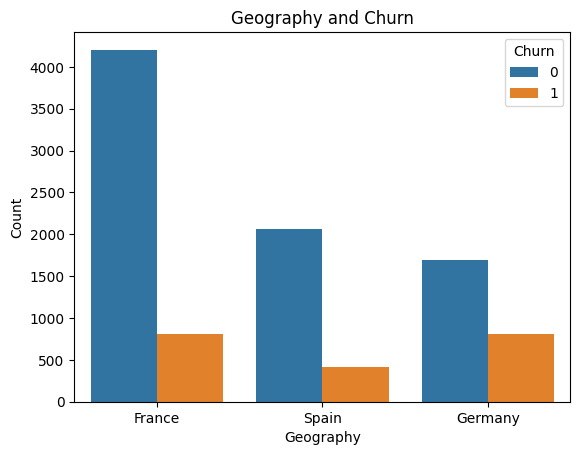

In [79]:
sns.countplot(x='Geography', hue='Churn', data=df)
plt.title('Geography and Churn')
plt.xlabel('Geography')
plt.ylabel('Count')
plt.show()

**Report:**
- France has the largest customer base and moderate churn.

- Germany has a smaller base but a higher churn proportion.

- Spain shows the lowest churn rate.

Retention strategies should focus more on German customers, as their churn rate appears comparatively high despite fewer total customers.

# Tenure

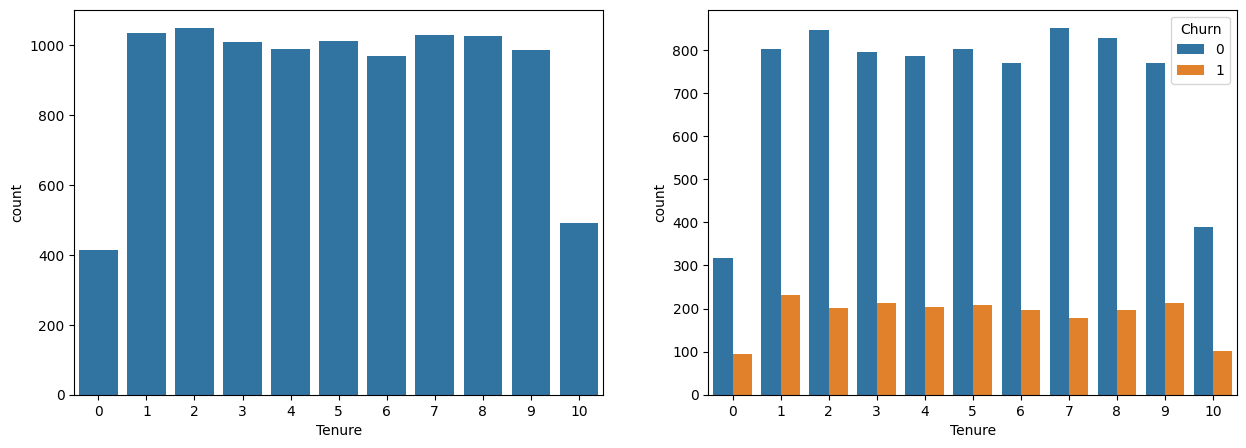

In [80]:
fig,ax = plt.subplots(1,2,figsize=(15,5))
sns.countplot(x='Tenure', data=df,ax=ax[0])
sns.countplot(x='Tenure', hue='Churn', data=df,ax=ax[1])
plt.show()

**Report:**
- Customer counts are fairly even across tenures 1–9 years.

- Tenure 0 and 10 have fewer customers overall.

- Churn appears consistently present across all tenure groups, with no strong drop as tenure increases — meaning loyalty isn’t strongly tied to tenure here.

# Bank Balance

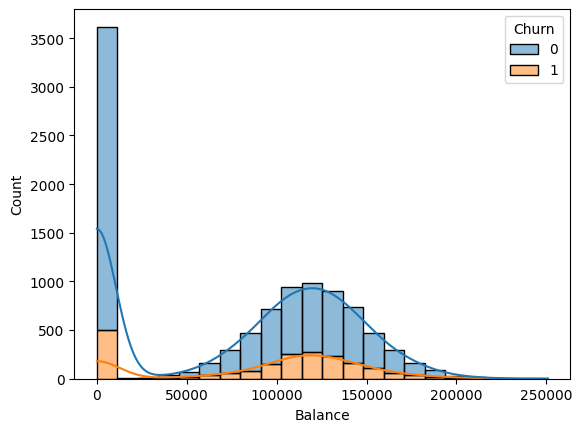

In [81]:
sns.histplot(data=df, x="Balance", hue="Churn", multiple="stack", kde=True)
plt.show()

**Report:**
- Many customers have a zero balance, mostly non-churners.

- Churn is more common among customers with mid to high balances (around 100k–150k).

- Very high balances (>200k) are rare and mostly non-churners.

# Number of products Purchased 

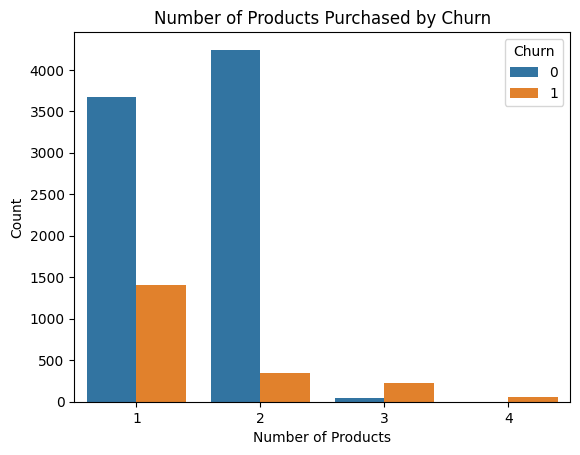

In [82]:
sns.countplot(x='NumOfProducts', hue='Churn', data=df)
plt.title('Number of Products Purchased by Churn')
plt.xlabel('Number of Products')
plt.ylabel('Count')
plt.show()

**Report:**
- Most customers have 1 or 2 products.

- Churn is highest among 1-product customers.

- Customers with 3 or 4 products are few, but their churn rates are relatively high.


#### Customers with/without credit card:

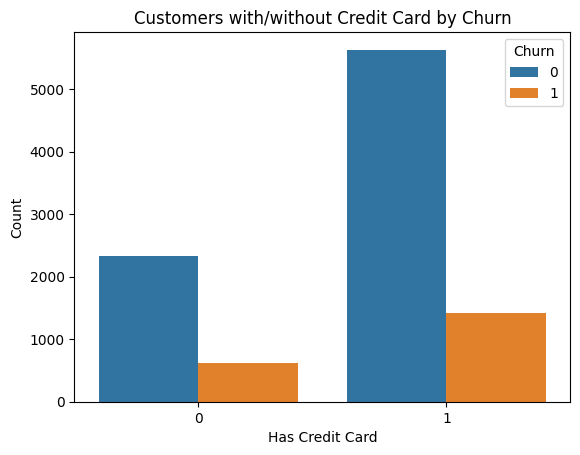

In [83]:
sns.countplot(x=df['HasCrCard'],hue=df['Churn'])
plt.title('Customers with/without Credit Card by Churn')
plt.xlabel('Has Credit Card')
plt.ylabel('Count')
plt.show()

**Report:**
- Majority of customers have credit cards.

- Churn rates are similar for customers with or without a credit card — no strong impact observed.

# Estimated Salary:

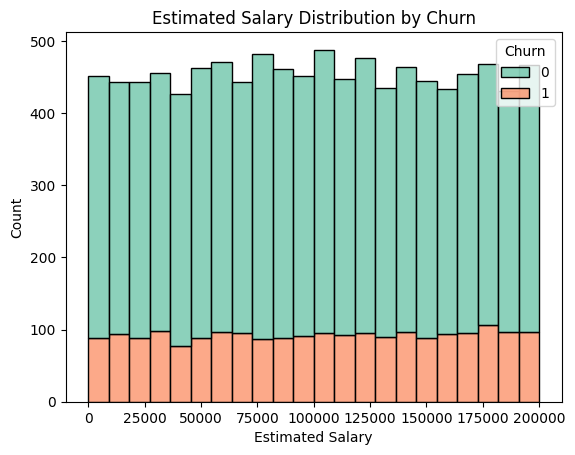

In [84]:
sns.histplot(data=df,        x='EstimatedSalary',
             hue='Churn',    multiple='stack',
             palette='Set2'
             )
plt.title('Estimated Salary Distribution by Churn')
plt.xlabel('Estimated Salary')
plt.ylabel('Count')
plt.show()

**Report:**
- Salary distribution is fairly uniform across customers.

- Churn rate appears consistent across all salary ranges, showing no clear correlation.

- This suggests estimated salary is not a strong predictor of churn in this dataset.

## Data Preprocessing-2

In [85]:
#label encoding
variables = ['Geography','Gender']
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in variables:
    le.fit(df[i].unique())
    df[i]=le.transform(df[i])
    print(i,df[i].unique())

Geography [0 2 1]
Gender [0 1]


In [87]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Churn
0,-0.326221,0,0,42,2,-1.225848,1,1,1,0.021886,1
1,-0.440036,2,0,41,1,0.117350,1,0,1,0.216534,0
2,-1.536794,0,0,42,8,1.333053,3,1,0,0.240687,1
3,0.501521,0,0,39,1,-1.225848,2,0,0,-0.108918,0
4,2.063884,2,0,43,2,0.785728,1,1,1,-0.365276,0


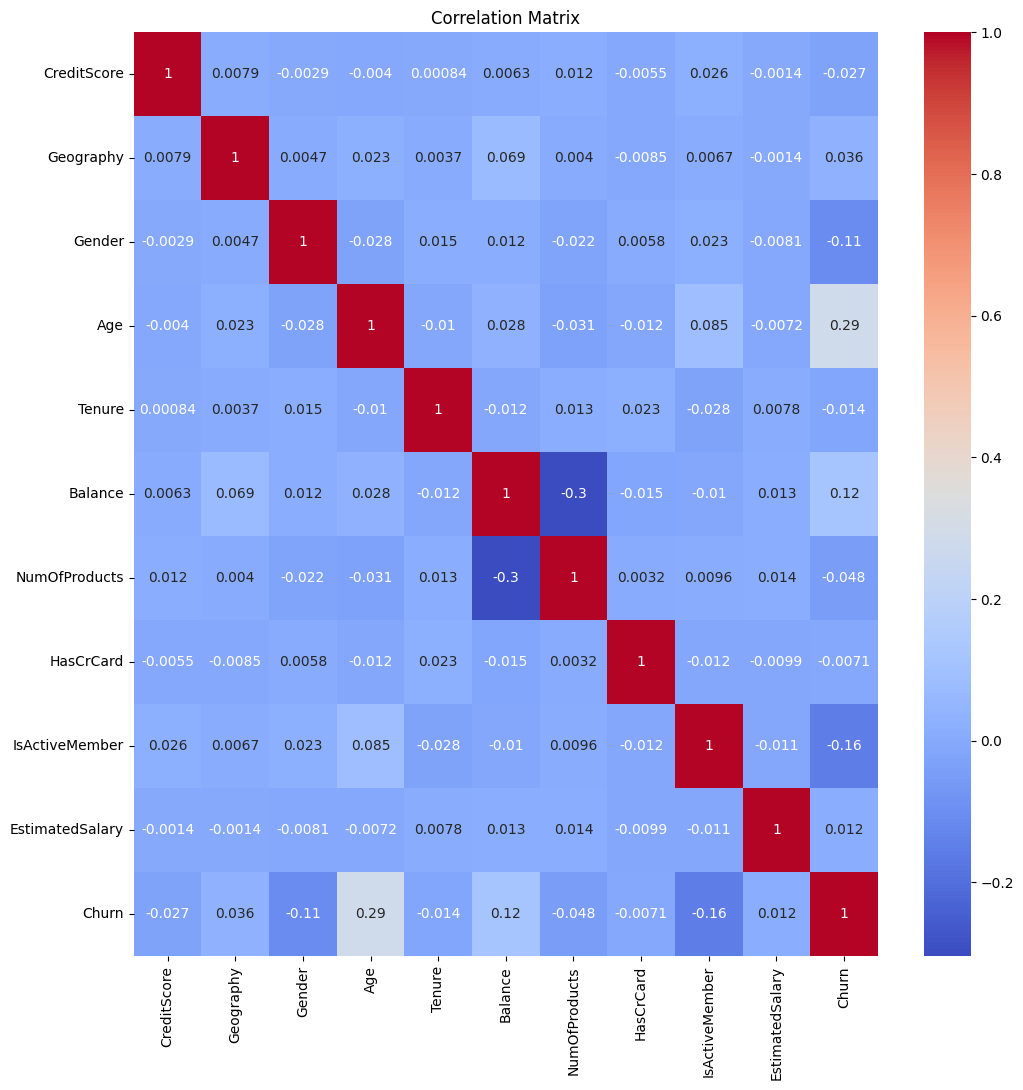

In [88]:
# Coorelation matrix

plt.figure(figsize=(12,12))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

**Report:**

* **Age** has the highest positive correlation with churn (**0.29**) → older customers are more likely to churn.
* **Being an active member** is negatively correlated with churn (**-0.16**) → active members are less likely to leave.
* **Gender** shows a small negative correlation (**-0.11**) → slight tendency for females to churn less.
* **Balance** has a small positive correlation (**0.12**) → higher balance, slightly higher churn probability.
* Most other variables (CreditScore, Salary, Tenure) have negligible correlation.

This means churn here is **weakly correlated** with most individual features, suggesting we’ll likely need **multivariate models** to detect patterns.


In [89]:
# Numerical features (int and float, excluding target 'Exited')
numerical_features = [
    "CreditScore",
    "Age",
    "Tenure",
    "Balance",
    "NumOfProducts",
    "HasCrCard",
    "IsActiveMember",
    "EstimatedSalary"
]

# Categorical features
categorical_features = [
    "Geography",
    "Gender"
]

print("Numerical Features:", numerical_features)
print("Categorical Features:", categorical_features)


Numerical Features: ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary']
Categorical Features: ['Geography', 'Gender']


In [98]:
import pandas as pd

def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

# Example usage
for col in numerical_features:
    outliers = detect_outliers_iqr(df, col)
    print(f"{col}: {len(outliers)} outliers")


CreditScore: 16 outliers
Age: 359 outliers
Tenure: 0 outliers
Balance: 0 outliers
NumOfProducts: 60 outliers
HasCrCard: 0 outliers
IsActiveMember: 0 outliers
EstimatedSalary: 0 outliers


In [99]:
continuous_features = [features for features in df.columns if len(df[features].unique()) > 25]
print("Continuous Features:", len(continuous_features))

Continuous Features: 4


In [100]:
continuous_features

['CreditScore', 'Age', 'Balance', 'EstimatedSalary']

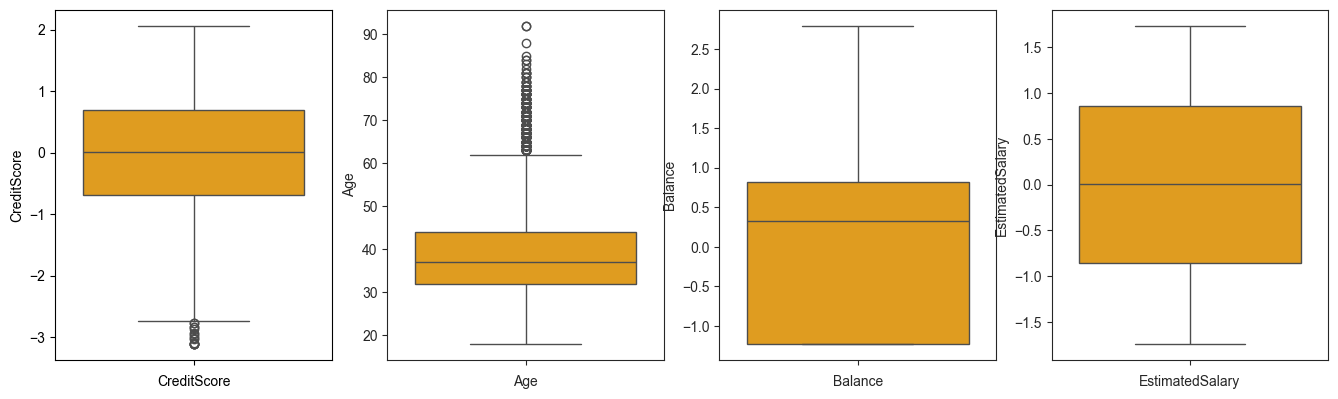

In [101]:
cont_features = continuous_features.copy()
plt.figure(figsize=(25, 10))

for i in range (len(cont_features)):
    plt.subplot(2,6,i+1)
    sns.set_style('ticks')
    plt.xlabel(cont_features[i])
    ax = sns.boxplot(df[cont_features[i]], color='orange')

Capping:

In [102]:
def detect_outliers(col):

    percentile25 = df[col].quantile(0.25)
    percentile75 = df[col].quantile(0.75)
    print('\n ####', col, '####')
    print("percentile25", percentile25)
    print("percentile75", percentile75)
    iqr = percentile75 - percentile25
    upper_limit = percentile75 + 1.5 * iqr
    lower_limit = percentile25 - 1.5 * iqr
    print("Upper Limit:", upper_limit)
    print("Lower Limit:", lower_limit)
    df.loc[df[col] > upper_limit, col] = upper_limit
    df.loc[df[col] < lower_limit, col] = lower_limit
    return df

In [103]:
for col in cont_features:
        detect_outliers(col)


 #### CreditScore ####
percentile25 -0.6883585719214899
percentile75 0.6981093733515285
Upper Limit: 2.7778112912610555
Lower Limit: -2.768060489831017

 #### Age ####
percentile25 32.0
percentile75 44.0
Upper Limit: 62.0
Lower Limit: 14.0

 #### Balance ####
percentile25 -1.2258476714090278
percentile75 0.8199204543114416
Upper Limit: 3.8885726428921457
Lower Limit: -4.294499859989732

 #### EstimatedSalary ####
percentile25 -0.8535935281793107
percentile75 0.8572430923264887
Upper Limit: 3.4234980230851875
Lower Limit: -3.4198484589380094


In [104]:
df[continuous_features].skew(axis=0, skipna=True)

CreditScore       -0.064255
Age                0.630315
Balance           -0.141109
EstimatedSalary    0.002085
dtype: float64

In [107]:
# Normalizing the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df[['CreditScore','Balance','EstimatedSalary']] = scaler.fit_transform(df[['CreditScore','Balance','EstimatedSalary']]) 


In [108]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Churn
0,-0.326878,0,0,42,2,-1.225848,1,1,1,0.021886,1
1,-0.440804,2,0,41,1,0.117350,1,0,1,0.216534,0
2,-1.538636,0,0,42,8,1.333053,3,1,0,0.240687,1
3,0.501675,0,0,39,1,-1.225848,2,0,0,-0.108918,0
4,2.065569,2,0,43,2,0.785728,1,1,1,-0.365276,0


# Train Test Split

In [42]:
X = df.drop('Churn', axis=1)
y = df['Churn']



# **why we use the 5 models** 


 **1. Logistic Regression**

We use it as a **baseline model** for binary classification (`Churn: Yes/No`).

* Simple, interpretable, and fast to train.
* Helps identify which features strongly influence churn.

 **2. Random Forest Classifier**

We use it to handle **complex, non-linear relationships** in the data.

* Combines many decision trees to improve accuracy.
* Handles missing values, outliers, and categorical variables well.

 **3. XGBoost Classifier**

We use it for **high-performance predictions**.

* Uses gradient boosting to reduce errors sequentially.
* Often achieves better accuracy than Random Forest on tabular data.

 **4. Gradient Boosting Classifier**

We use it for **fine-tuned, sequential learning**.

* Each tree corrects the mistakes of the previous one.
* Works well on medium-sized datasets with mixed feature types.

 **5. Support Vector Machine (SVM)**

We use it to find the **best boundary between churners and non-churners**.

* Effective for smaller datasets with clear class separation.
* Can use kernel tricks for complex decision boundaries.




# Grid Search

In [43]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC

models ={
    "   Logistic Regression": LogisticRegression(),
        "   Random Forest Classifier": RandomForestClassifier(),
        "   XGBoost Classifier": XGBClassifier(),
        "   Gradient Boosting Classifier": GradientBoostingClassifier(),
        "   Support Vector Machine (SVM)": SVC()
}

Check each model's Performance:

In [54]:
# Create a function whcih can evaluate each model and return report 

from sklearn.metrics import accuracy_score, classification_report,ConfusionMatrixDisplay

def evaluate_models(X, y, models):

    # Split the data into training and testing sets
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    models_list = []
    scores = []

    for i in range(len(list(models))):
        model = list(models.values())[i]
        model.fit(X_train, y_train)

        # Predicting the test set results
        y_pred = model.predict(X_test)

        score = accuracy_score(y_test, y_pred)

        model_name = list(models.keys())[i]
        print(f'----score of {model_name} is {score}----')
        models_list.append(model_name)
        scores.append(score)

    print()

    report = pd.DataFrame()
    report['Model_name'] = models_list
    report['Score'] = scores
    return report



In [50]:
report= evaluate_models(X, y, models)



c:\Users\pc\anaconda3\envs\py38env\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


----score of    Logistic Regression is 0.8155----
----score of    Random Forest Classifier is 0.872----
----score of    XGBoost Classifier is 0.8545----
----score of    Gradient Boosting Classifier is 0.8655----
----score of    Support Vector Machine (SVM) is 0.8035----



In [52]:
report.sort_values('Score')

,Model_name,Score
4,Support Vector Machine (SVM),0.8035
0,Logistic Regression,0.8155
2,XGBoost Classifier,0.8545
3,Gradient Boosting Classifier,0.8655
1,Random Forest Classifier,0.8720


**Conclusion:**
Tree-based ensemble methods, particularly ***Random Forest***, showed the best performance and are recommended for final deployment.

In [55]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [53]:
best_rf_model = RandomForestClassifier(
    n_estimators=100,        # Number of trees
    max_depth=None,          # Can be tuned (e.g., 10, 20, etc.)
    min_samples_split=2,     # Minimum samples to split a node
    min_samples_leaf=1,      # Minimum samples at a leaf node
    max_features='sqrt',     # Number of features to consider per split
    random_state=42,         # Ensures reproducibility
    n_jobs=-1,               # Use all CPU cores
    class_weight='balanced'  # Good for imbalanced classes
)

In [56]:
best_model = best_rf_model.fit(X_train,y_train)
y_pred = best_model.predict(X_test)
score = accuracy_score(y_test,y_pred)
cr = classification_report(y_test,y_pred)

print("Random Forest")
print("Accuracy Score Value: {:.4f}".format(score))
print(cr)

Random Forest
Accuracy Score Value: 0.8710
              precision    recall  f1-score   support

           0       0.88      0.98      0.92      2416
           1       0.83      0.43      0.56       584

    accuracy                           0.87      3000
   macro avg       0.85      0.70      0.74      3000
weighted avg       0.87      0.87      0.85      3000



**Random Forest Classifier Performance**

The Random Forest model achieved an accuracy of **87.10%**. For the majority class (non-churn, `0`), the model delivered high precision (**0.88**) and recall (**0.98**), indicating strong capability in correctly identifying non-churn customers. For the minority class (churn, `1`), precision was **0.83** but recall dropped to **0.43**, showing the model struggles to capture all churn cases. The macro-averaged F1-score was **0.74**, while the weighted average was **0.85**, reflecting balanced overall performance but with room for improvement in detecting churners.




# Confusion matrix of Model

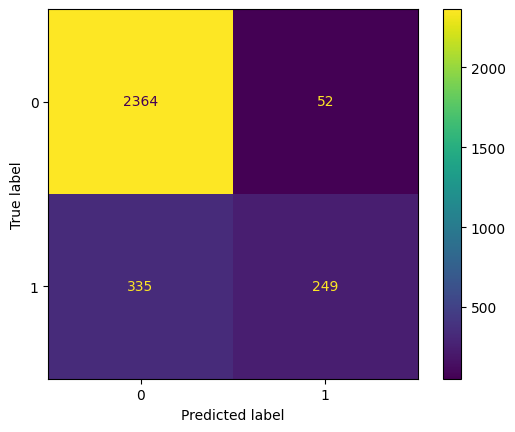

In [58]:
ConfusionMatrixDisplay.from_estimator(best_model, X_test, y_test)
plt.show()

The model is **very good at predicting class 0** (low false positives) but **struggles with class 1**, missing many positives (high false negatives), indicating it needs better recall for class 1.
